[*********************100%***********************]  1 of 1 completed


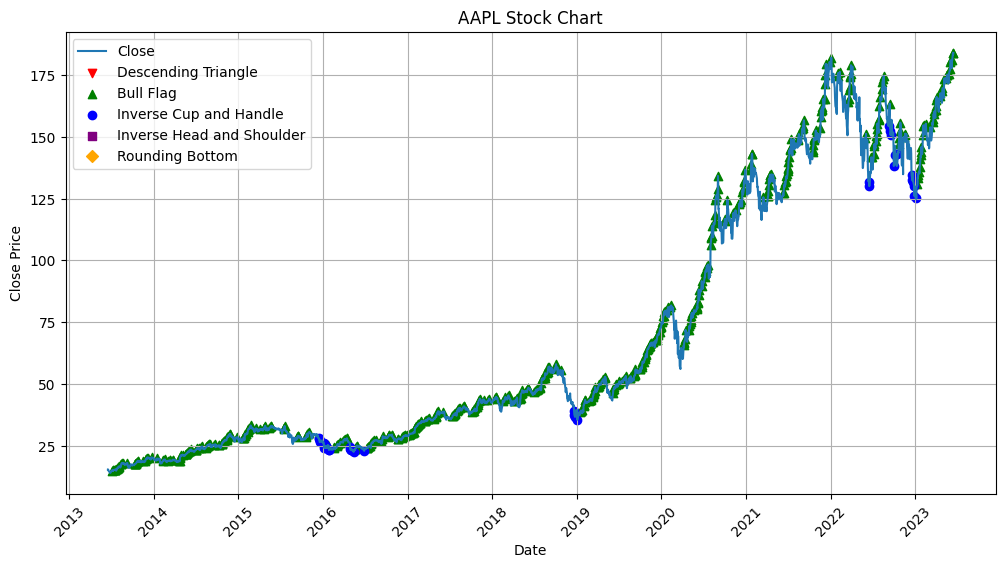

[*********************100%***********************]  1 of 1 completed


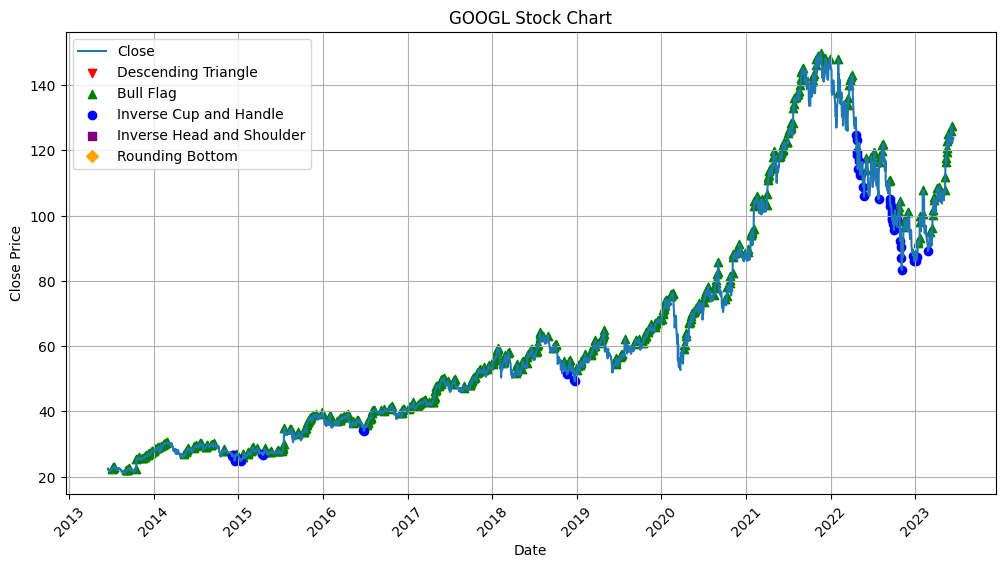

[*********************100%***********************]  1 of 1 completed


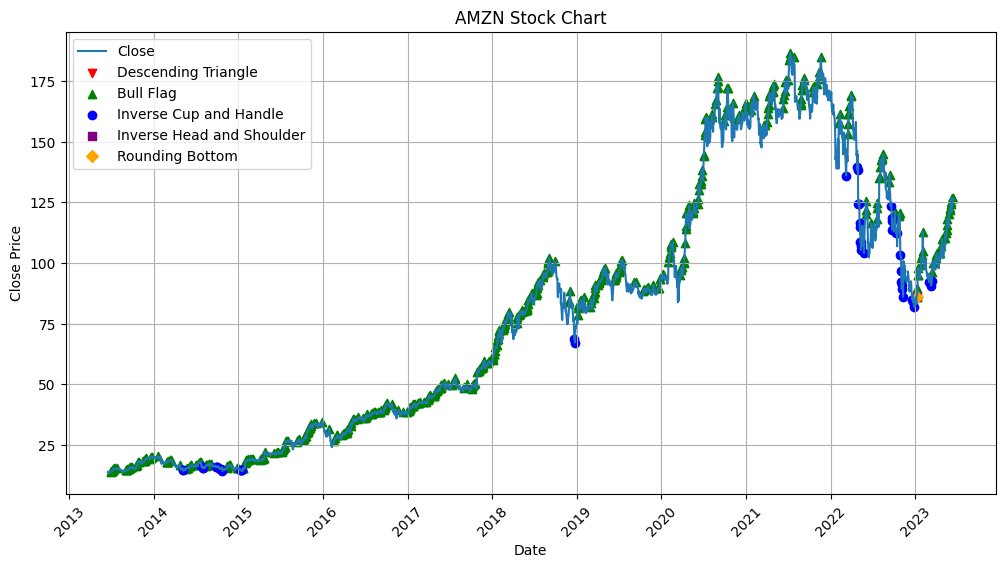

[*********************100%***********************]  1 of 1 completed


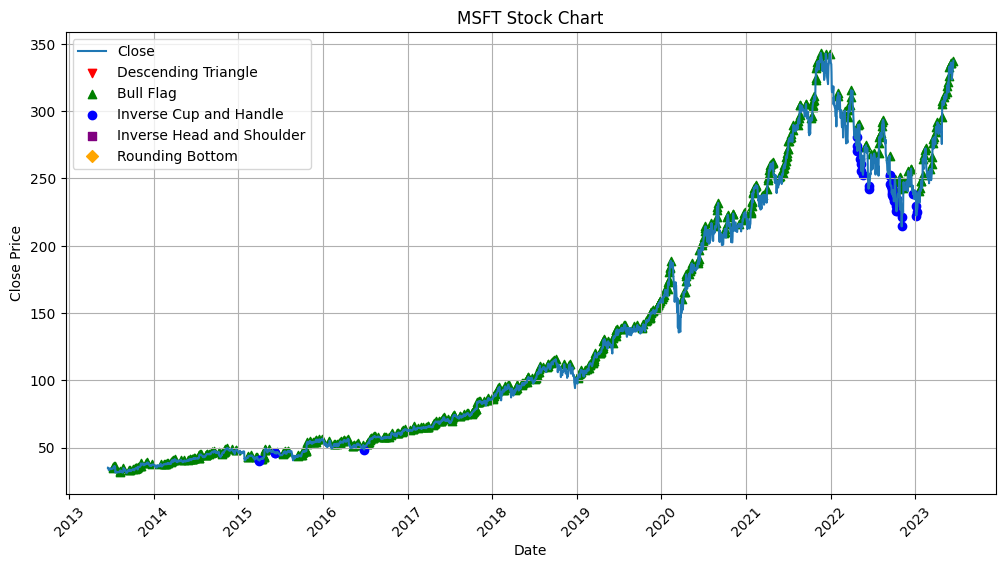

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- FB: No timezone found, symbol may be delisted


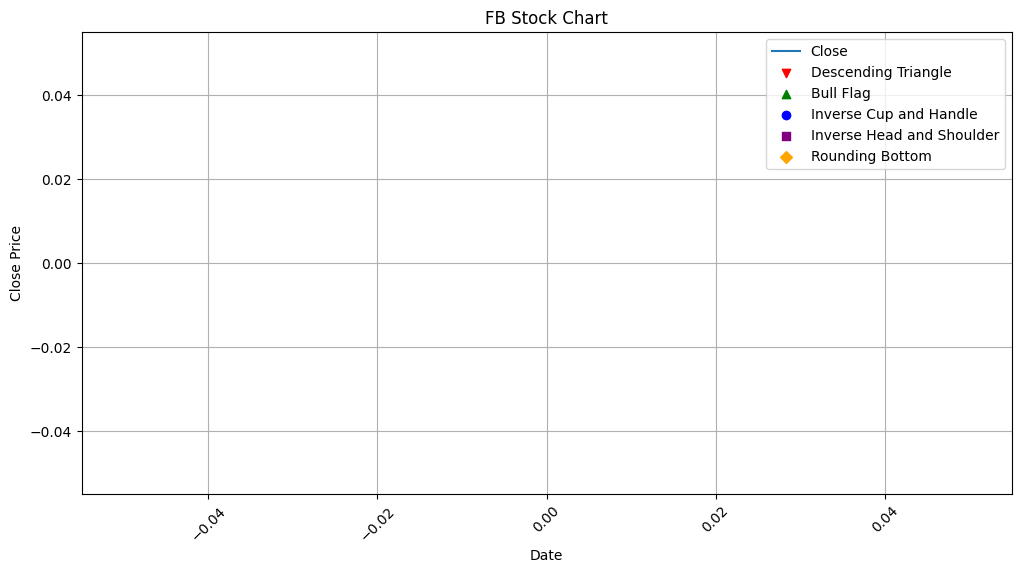

[*********************100%***********************]  1 of 1 completed


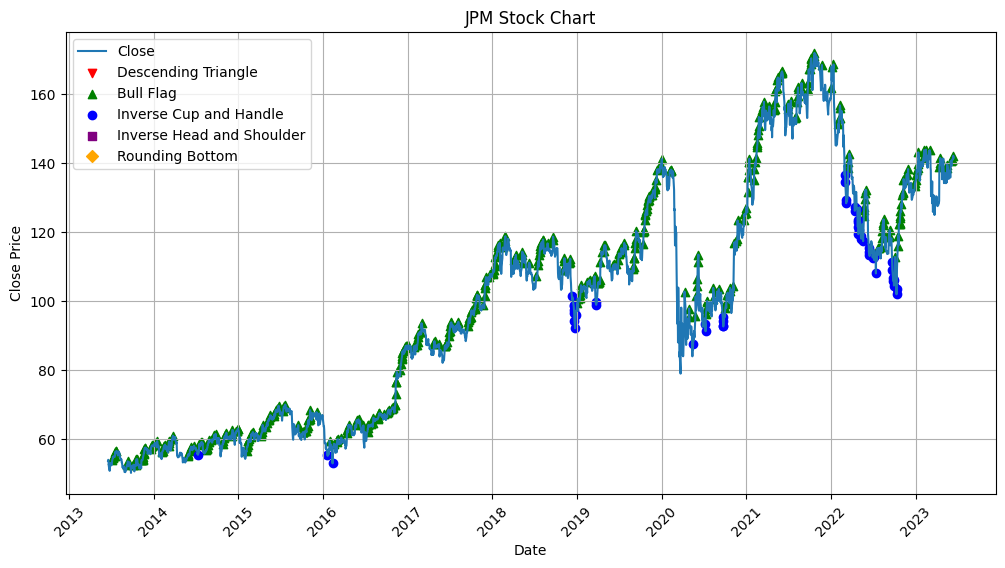

[*********************100%***********************]  1 of 1 completed


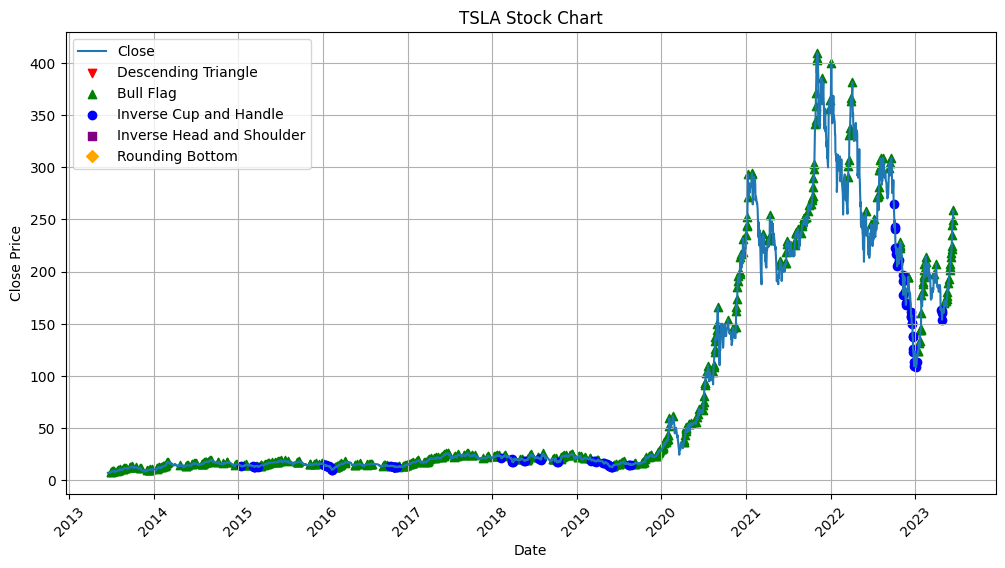

[*********************100%***********************]  1 of 1 completed


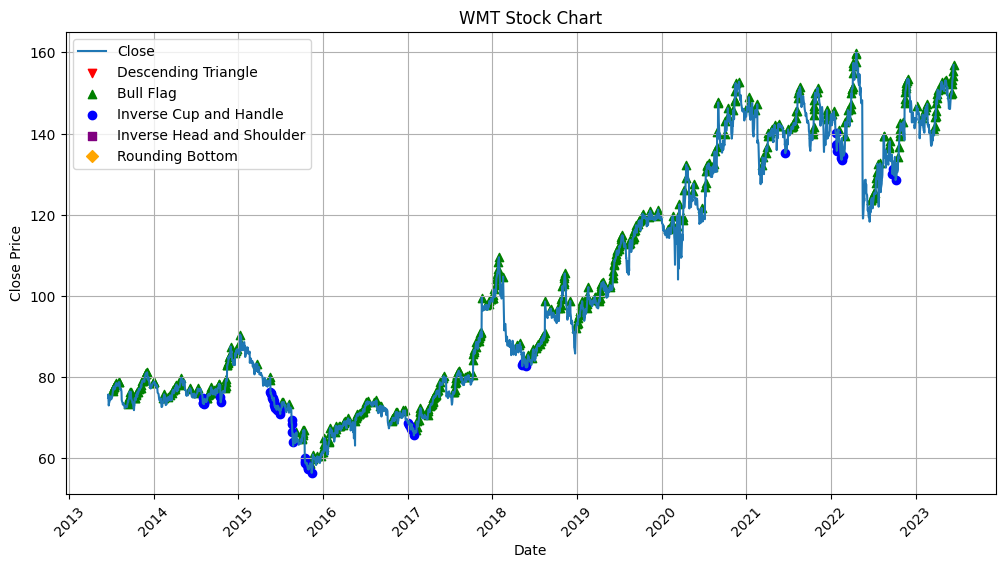

[*********************100%***********************]  1 of 1 completed


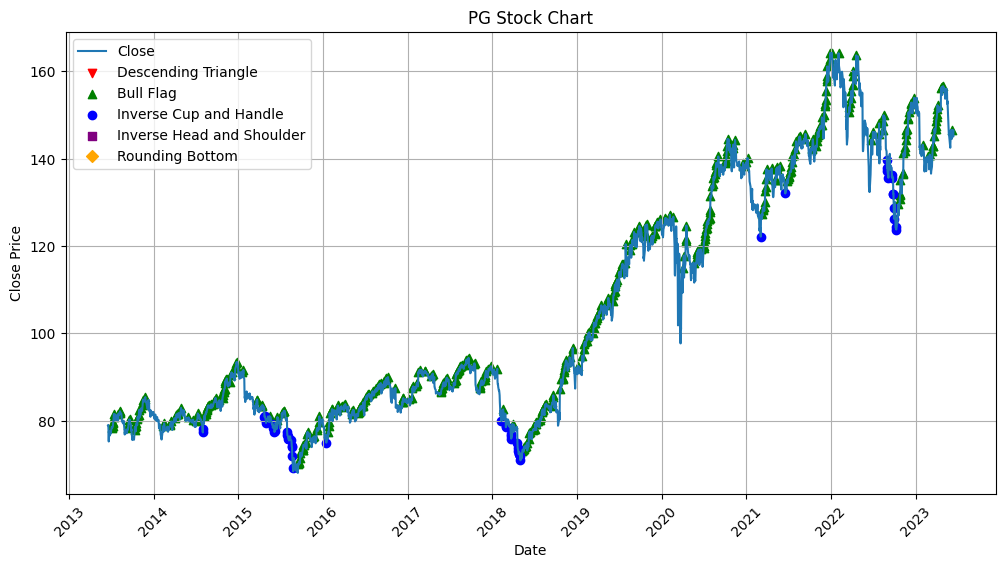

[*********************100%***********************]  1 of 1 completed


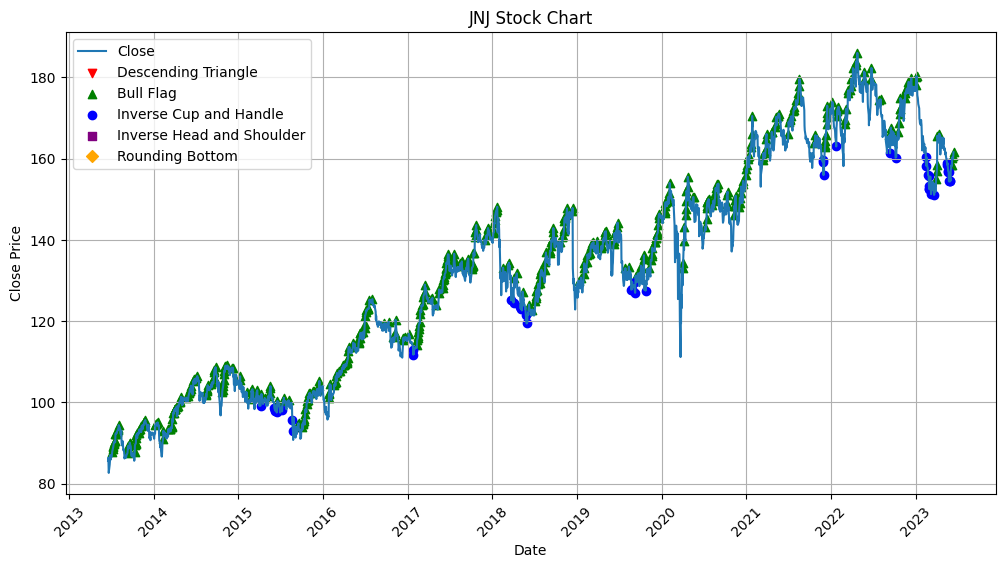

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Taking these multinational companies stocks
stock_symbols = ['AAPL', 'GOOGL', 'AMZN', 'MSFT', 'FB', 'JPM', 'TSLA', 'WMT', 'PG', 'JNJ']

for symbol in stock_symbols:

    stock_data = yf.download(symbol, start='2013-06-15', end='2023-06-15')

    #Calculate moving averages for pattern identification
    stock_data['SMA_50'] = stock_data['Close'].rolling(window=50).mean()
    stock_data['SMA_200'] = stock_data['Close'].rolling(window=200).mean()

    #Descending Triangle
    descending_triangle = (stock_data['High'].rolling(window=30).max() == stock_data['High']) & \
                          (stock_data['Low'].rolling(window=30).min().shift(1) == stock_data['Low'])
    stock_data['DescendingTriangle'] = descending_triangle.astype(int)

    #Bull Flag
    bull_flag = (stock_data['Close'].rolling(window=10).max() == stock_data['Close'])
    stock_data['BullFlag'] = bull_flag.astype(int)

    #Inverse Cup and Handle
    inverse_cup_handle = (stock_data['Low'].rolling(window=30).min() == stock_data['Low']) & \
                         (stock_data['SMA_50'] < stock_data['SMA_200'])
    stock_data['InverseCupHandle'] = inverse_cup_handle.astype(int)

    #Inverse Head and Shoulder
    inverse_head_shoulder = (stock_data['Low'].rolling(window=30).min() == stock_data['Low']) & \
                            (stock_data['Close'].rolling(window=10).max() == stock_data['Close'])
    stock_data['InverseHeadShoulder'] = inverse_head_shoulder.astype(int)

    #Rounding Bottom
    rounding_bottom = (stock_data['Low'].rolling(window=30).min() == stock_data['Low']) & \
                      (stock_data['Close'].rolling(window=10).max() == stock_data['Close'])
    stock_data['RoundingBottom'] = rounding_bottom.astype(int)

    plt.figure(figsize=(12, 6))
    plt.plot(stock_data.index, stock_data['Close'], label='Close')
    plt.scatter(stock_data[stock_data['DescendingTriangle'] == 1].index, stock_data[stock_data['DescendingTriangle'] == 1]['Close'], marker='v', color='red', label='Descending Triangle')
    plt.scatter(stock_data[stock_data['BullFlag'] == 1].index, stock_data[stock_data['BullFlag'] == 1]['Close'], marker='^', color='green', label='Bull Flag')
    plt.scatter(stock_data[stock_data['InverseCupHandle'] == 1].index, stock_data[stock_data['InverseCupHandle'] == 1]['Close'], marker='o', color='blue', label='Inverse Cup and Handle')
    plt.scatter(stock_data[stock_data['InverseHeadShoulder'] == 1].index, stock_data[stock_data['InverseHeadShoulder'] == 1]['Close'], marker='s', color='purple', label='Inverse Head and Shoulder')
    plt.scatter(stock_data[stock_data['RoundingBottom'] == 1].index, stock_data[stock_data['RoundingBottom'] == 1]['Close'], marker='D', color='orange', label='Rounding Bottom')
    plt.title(symbol + ' Stock Chart')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()
